I. IMPORT THE RELEVANT LIBRARIES 

In [1]:
#import all the relevant libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import xgboost  as xgb

2. lOAD THE DATA 

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Downloads\Toyota_Data.csv")
data.sample(5)

,Date,Adj Close,Close,High,Low,Open,Volume
6336,2005-04-22,56.315865,72.449997,72.949997,72.160004,72.790001,193200
5931,2003-09-12,48.040344,63.250000,63.599998,62.500000,62.500000,234000
5998,2003-12-17,49.598228,64.949997,65.199997,64.400002,64.400002,112300
3381,1993-07-30,22.161179,31.250000,31.250000,31.000000,31.000000,3600
2572,1990-05-18,18.095190,25.929752,26.239670,25.929752,0.000000,3872


3. DATA CLEANING AND PREPROCESING 

In [3]:
# check for the  shape 
data.shape

(11291, 7)

In [4]:
data = data.drop(columns=[col for col in data.columns if not col or pd.isna(col)])
data.sample()

,Date,Adj Close,Close,High,Low,Open,Volume
6985,2007-11-19,88.310829,108.800003,110.349998,107.980003,109.75,531100


In [5]:
# Check for duplicates 
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [7]:
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

4. FEATURE ENGINEERING 

In [8]:
# convert the date column to months and dates 
data.Date

0        1980-03-17
1        1980-03-18
2        1980-03-19
3        1980-03-20
4        1980-03-21
            ...    
11286    2024-12-20
11287    2024-12-23
11288    2024-12-24
11289    2024-12-26
11290    2024-12-27
Name: Date, Length: 11291, dtype: object

In [9]:
# convert the date to datetime format 
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
# add the  year column 
data['month'] = data['Date'].dt.month      # or .dt.strftime('%B') for full month name
data['year'] = data['Date'].dt.year
data.sample(5)


,Date,Adj Close,Close,High,Low,Open,Volume,month,year
9365,2017-05-04,109.160004,109.160004,109.269997,108.440002,109.269997,152400,5,2017
7795,2011-02-07,73.594421,85.129997,85.239998,84.699997,84.730003,327900,2,2011
3899,1995-08-17,28.938713,40.125000,40.125000,40.000000,40.125000,6100,8,1995
7726,2010-10-28,61.491493,71.129997,71.190002,70.519997,70.959999,534300,10,2010
5233,2000-11-28,52.514263,70.500000,71.099998,70.449997,70.900002,9800,11,2000


5. EXPLORATORY DATA ANALYSIS 

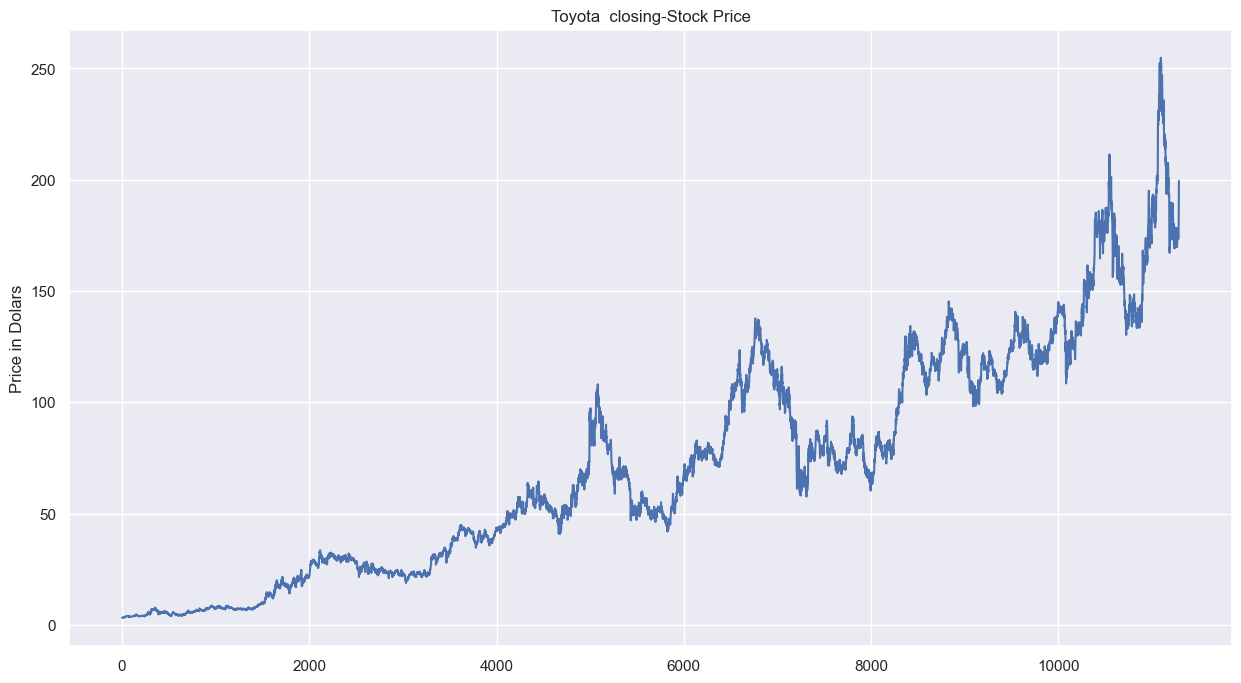

In [11]:
# SHOW THE DISTRIBUTION OF THE STOCK MARKET
plt.figure(figsize=(15,8))
plt.plot(data['Close'])
plt.ylabel("Price in Dolars")
plt.title('Toyota  closing-Stock Price')
plt.show()

In [12]:
# drop  the adj close column 
data.drop(['Adj Close'],axis=1)
data.sample(5)
data

,Date,Adj Close,Close,High,Low,Open,Volume,month,year
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,3,1980
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,3,1980
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,3,1980
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,3,1980
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,3,1980
...,...,...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700,12,2024
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700,12,2024
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600,12,2024
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200,12,2024


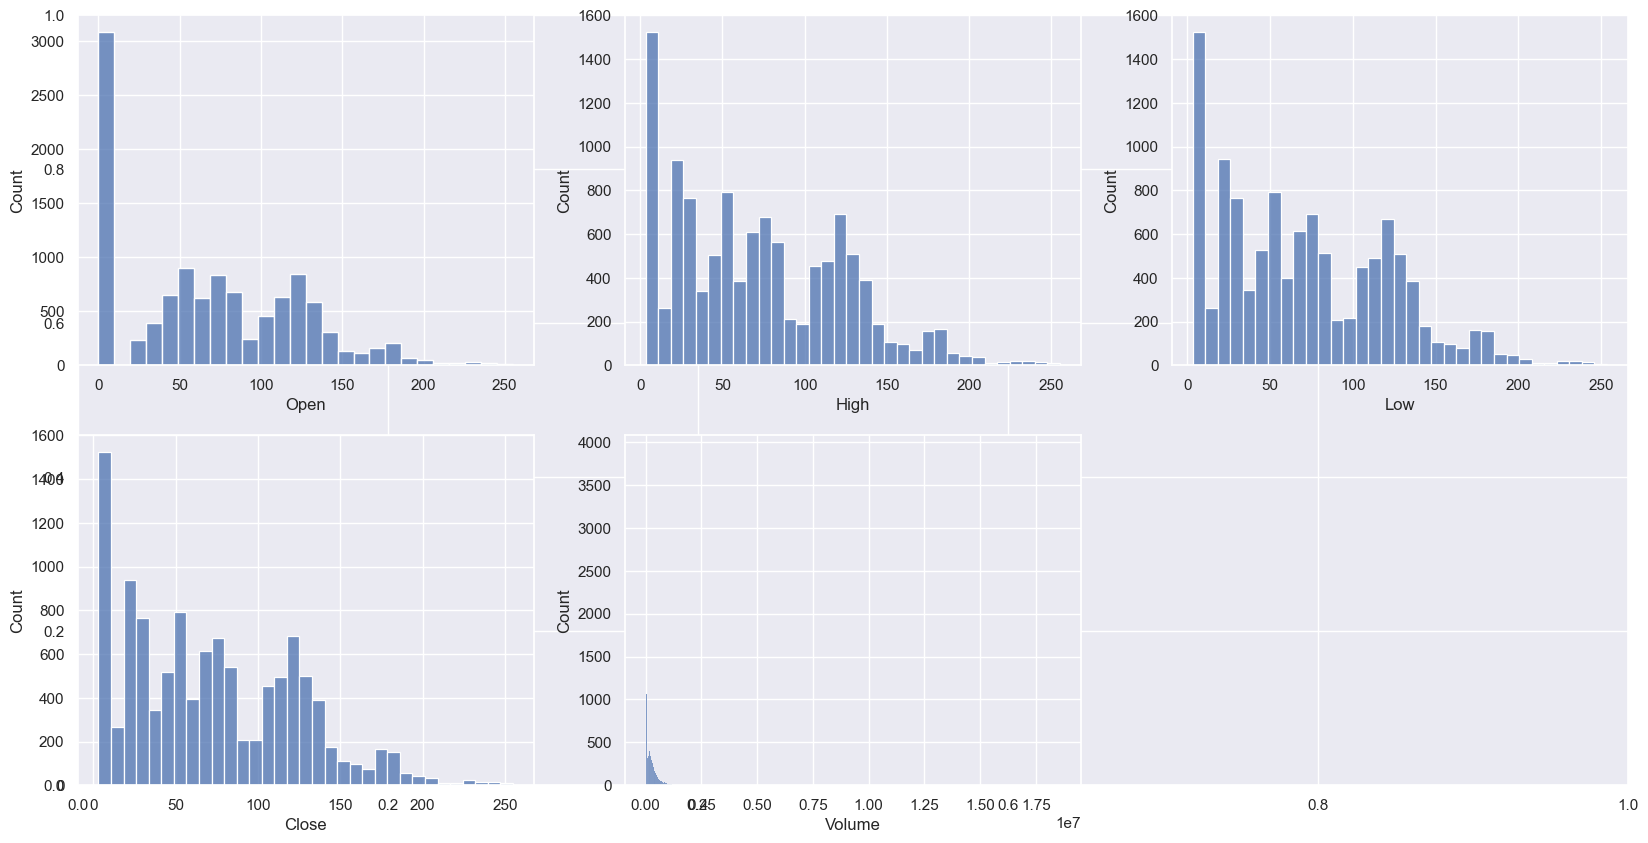

In [13]:
# show the distibution of the continous features 
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(data[col])
plt.show()

In [14]:
data.describe(include="all")

,Date,Adj Close,Close,High,Low,Open,Volume,month,year
count,11291,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000
mean,2002-07-28 16:48:32.904082944,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05,6.558144,2002.070144
min,1980-03-17 00:00:00,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00,1.000000,1980.000000
25%,1991-05-15 12:00:00,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04,4.000000,1991.000000
50%,2002-07-25 00:00:00,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04,7.000000,2002.000000
75%,2013-10-09 12:00:00,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05,10.000000,2013.000000
max,2024-12-27 00:00:00,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07,12.000000,2024.000000
std,NaN,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05,3.423161,12.932236


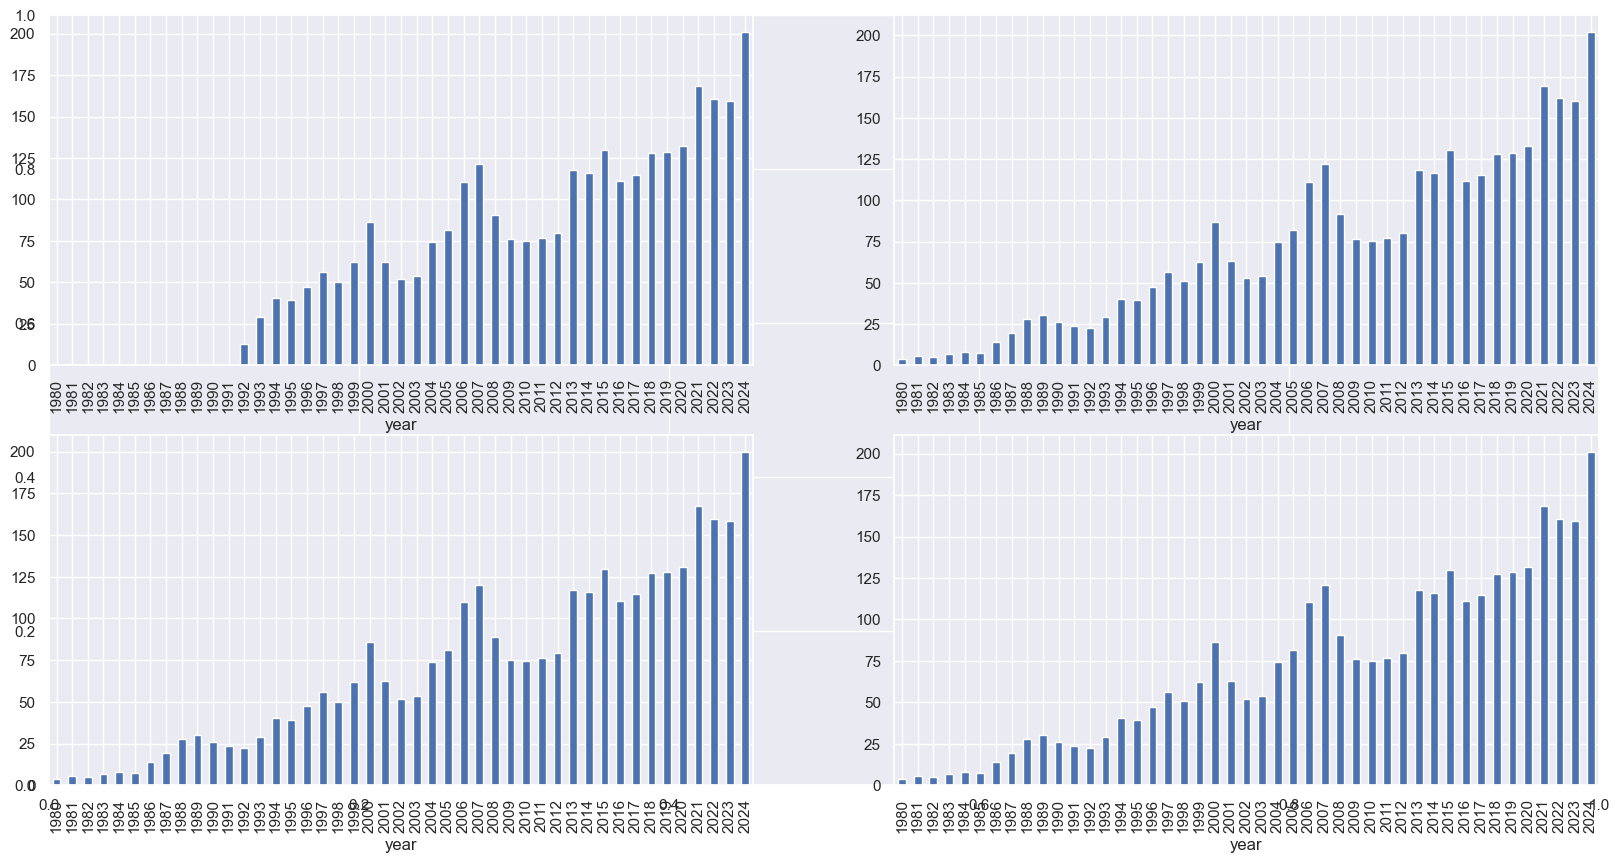

In [15]:
# Show distributions by year 
data_grouped = data.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [16]:
# exploring the target variables
print(data['Close'].value_counts())

Close
7.228393      36
7.139154      31
22.500000     29
23.000000     28
7.317633      28
              ..
91.820000      1
88.540001      1
89.050003      1
82.639999      1
199.520004     1
Name: count, Length: 5853, dtype: int64


In [17]:
# show percentages 
print(data['Close'].value_counts(normalize=True)*100)

Close
7.228393      0.318838
7.139154      0.274555
22.500000     0.256842
23.000000     0.247985
7.317633      0.247985
                ...   
91.820000     0.008857
88.540001     0.008857
89.050003     0.008857
82.639999     0.008857
199.520004    0.008857
Name: proportion, Length: 5853, dtype: float64


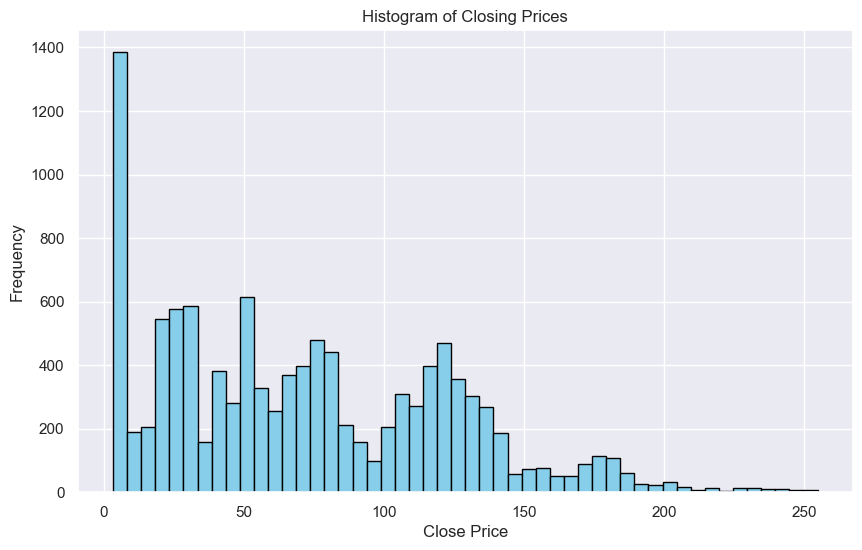

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


In [19]:
# define the features 
data = data.drop('Adj Close' , axis=1)
data.sample()

,Date,Close,High,Low,Open,Volume,month,year
3483,1993-12-23,31.75,31.75,31.5,31.75,3300,12,1993


In [20]:
data = data.drop('Date', axis = 1)
data.sample()

,Close,High,Low,Open,Volume,month,year
11115,231.839996,234.110001,231.699997,233.729996,220200,4,2024


In [21]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'month', 'year'], dtype='object')

In [22]:
X = data[['High', 'Low', 'Open', 'Volume', 'month', 'year']]
y = data['Close']

In [23]:
# normalize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# split the data 
X_test , X_train , y_test ,y_train = train_test_split(X_scaled , y ,test_size=0.3,random_state=42)

6. FIT THE M0DEL

In [25]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [26]:
# check the accuracy of this model 
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: assuming you already have y_pred and y_test
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.23201133685124148
MSE: 0.14792724565366056
RMSE: 0.38461311165073475
R² Score: 0.9999437467194562


In [28]:
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: assuming you already have y_pred and y_test
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.40354750294512104
MSE: 0.6141147023575301
RMSE: 0.7836547086297192
R² Score: 0.9997664665053072
